In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

In [4]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [6]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [8]:
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df.날짜.values[idx], '%Y.%m.%d').date()
    df.날짜.values[idx] = mdates.date2num(dt)
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

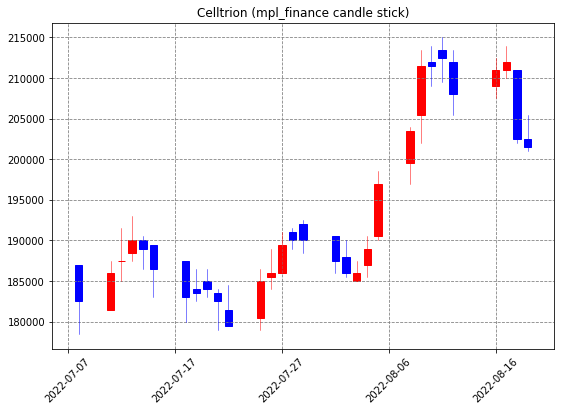

In [9]:
plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import mplfinance as mpf

In [12]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [13]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2178/379429220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [15]:
df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]


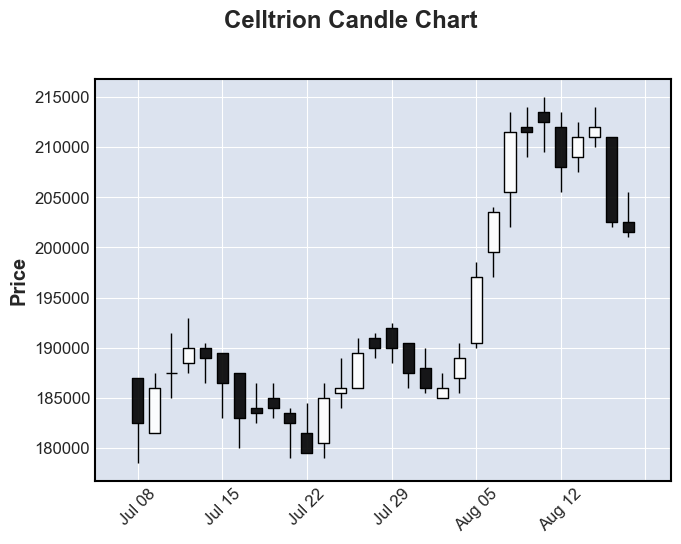

In [16]:
mpf.plot(df, title='Celltrion Candle Chart', type='candle')

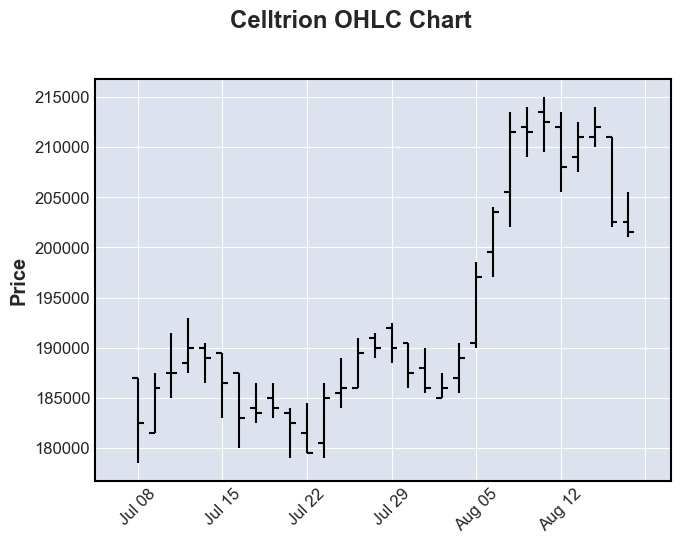

In [17]:
mpf.plot(df, title='Celltrion OHLC Chart', type='ohlc')

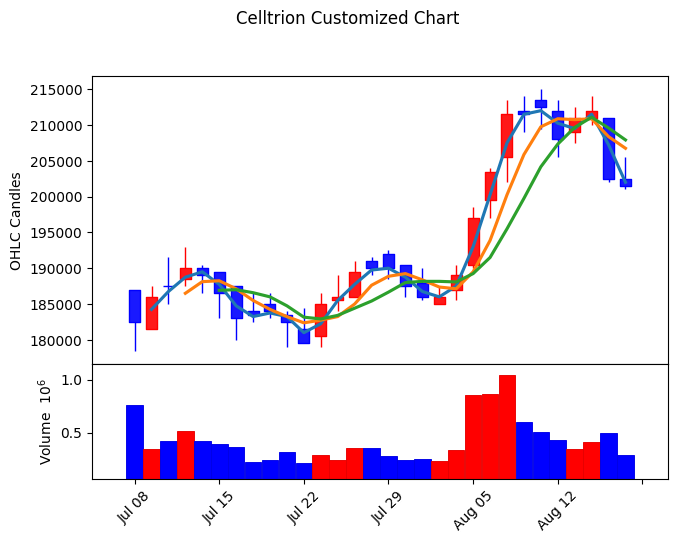

In [19]:
kwargs = dict(title='Celltrion Customized Chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='OHLC Candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)